In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('data/titanic/train.csv')
test = pd.read_csv('data/titanic/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

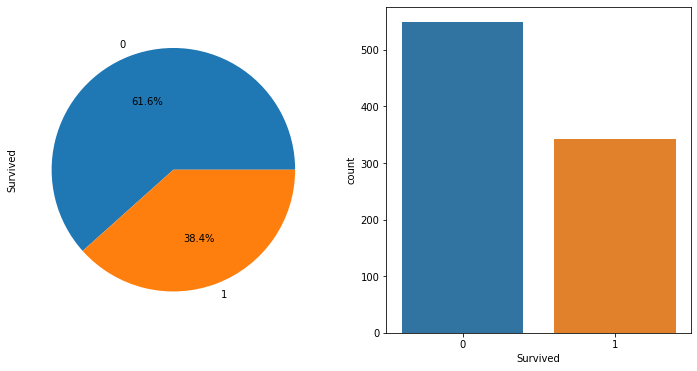

In [16]:
fig , ax = plt.subplots(1,2,figsize=(12,6))
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
sns.countplot('Survived',data=train,ax=ax[1])
# 1 means survive, 0 means died

In [17]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

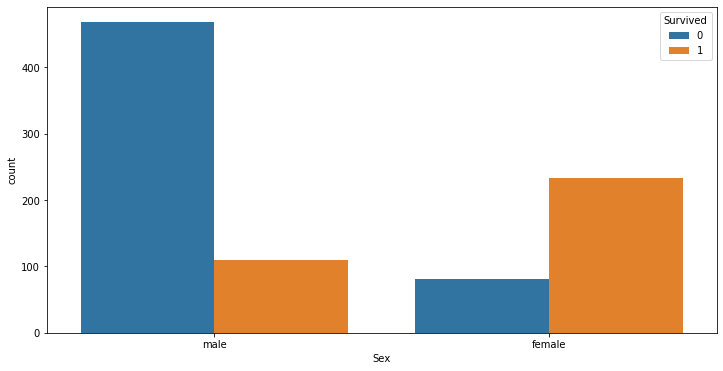

In [21]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot('Sex',hue='Survived',data=train,ax=ax)

In [27]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [28]:
## new function, great. 
pd.crosstab(train.Pclass,train.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Survived per class')

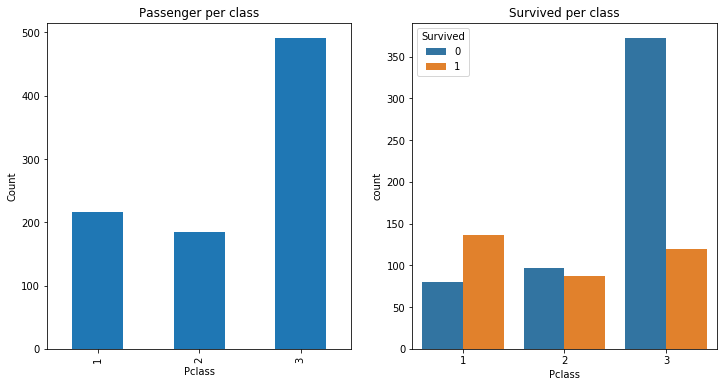

In [35]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
train.groupby(['Pclass'])['Survived'].count().plot.bar(ax=ax[0])
#instead of groupby you could have used value_counts directly
ax[0].set_ylabel('Count')
ax[0].set_title('Passenger per class')

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Survived per class')

In [38]:
# Now to find how many from which Pclass and gender, survived.
# First argument in crosstab is for rows and second for columns, can be single or list.
pd.crosstab([train.Survived,train.Sex],train.Pclass,margins=True)

Pclass             1    2    3  All
Survived Sex                       
0        female    3    6   72   81
         male     77   91  300  468
1        female   91   70   72  233
         male     45   17   47  109
All              216  184  491  891

/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


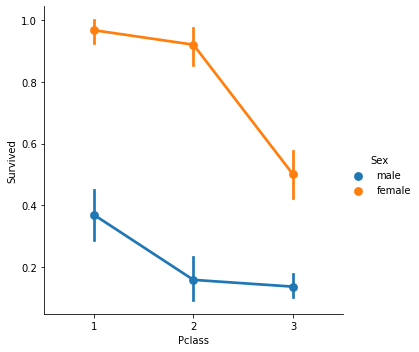

In [39]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train)

In [43]:
## to assign values to missng vals in age feature, we can use the name salutations as in Mr, master, miss
## and accordingly can provide better mean ages.
train['initial'] = 0
for i in train:
    train['initial'] = train.Name.str.extract('([A-Za-z]+)\.')

In [46]:
train['initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Don           1
Countess      1
Lady          1
Ms            1
Capt          1
Mme           1
Jonkheer      1
Name: initial, dtype: int64

In [50]:
pd.crosstab(train.Sex,train.initial,margins=True)

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [51]:
train['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
                         ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']
                         ,inplace=True)

In [52]:
train.groupby('initial')['Age'].mean()

initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [53]:
## as mentioned above, for Master mean age is 4.5, so there would have been no point
## in replacing missing values with overall mean

In [60]:
train.loc[(train['Age'].isnull())& (train['initial']=='Master'),'Age'] = 5
train.loc[(train['Age'].isnull())& (train['initial']=='Miss'),'Age'] = 22
train.loc[(train['Age'].isnull())& (train['initial']=='Mr'),'Age'] = 33
train.loc[(train['Age'].isnull())& (train['initial']=='Mrs'),'Age'] = 36
train.loc[(train['Age'].isnull())& (train['initial']=='Other'),'Age'] = 46

In [61]:
train.Age.isnull().any()

False

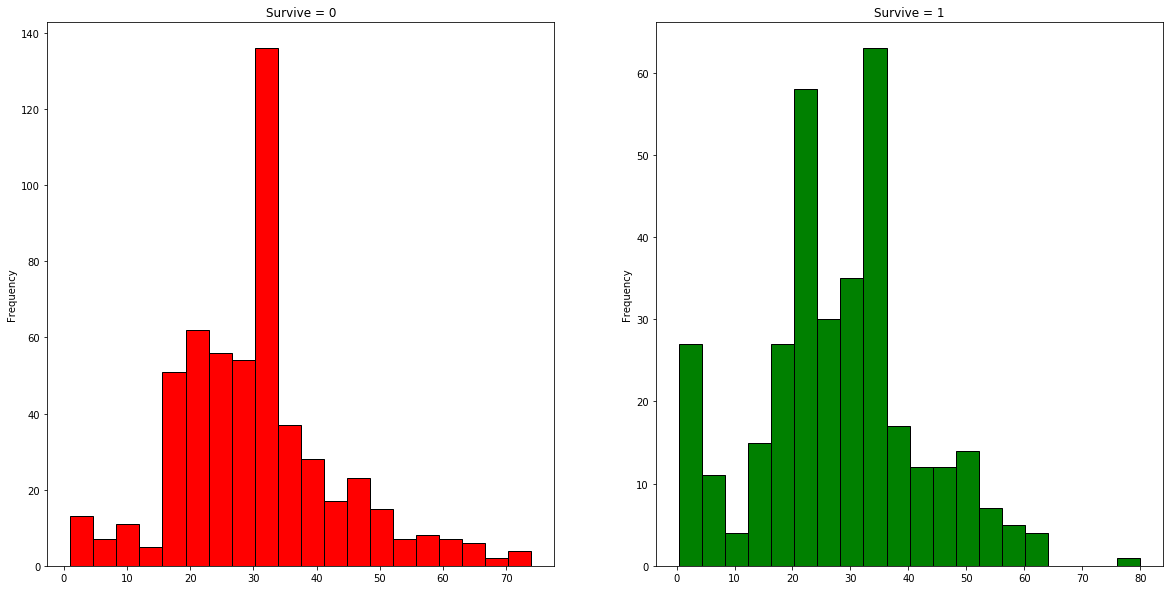

In [68]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0]['Age'].plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survive = 0')
ax[1].set_title('Survive = 1')
train[train['Survived']==1]['Age'].plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')

/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


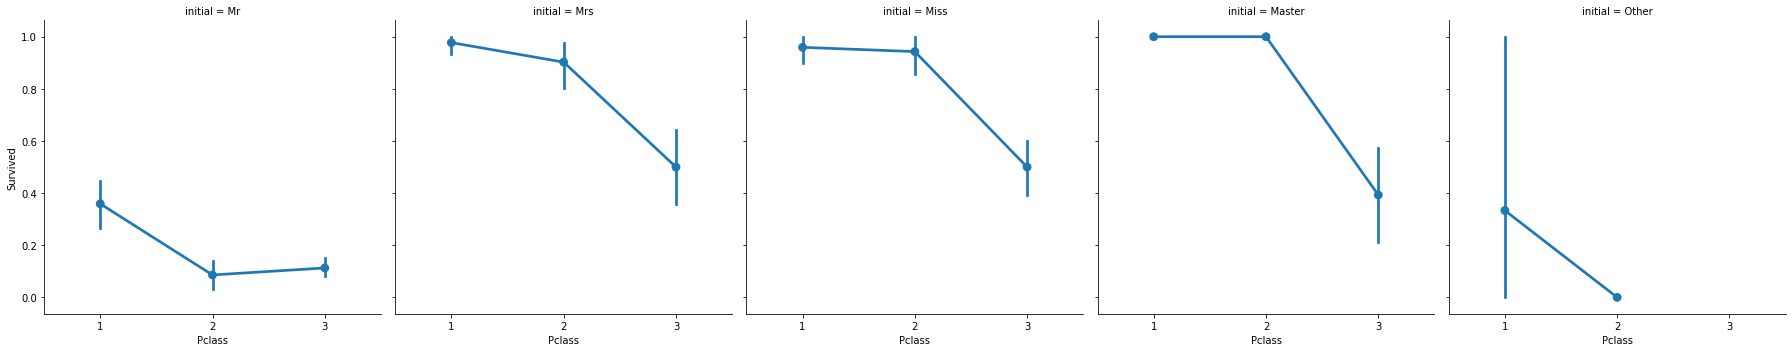

In [70]:
sns.factorplot('Pclass','Survived',col='initial',data=train)

In [71]:
#The Women and Child first policy thus holds true irrespective of the class.

In [73]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [75]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


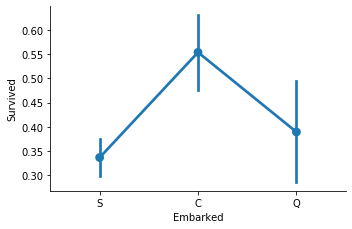

In [78]:
sns.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)

In [79]:
## embarked is different ports you take the ship from, people from C port survived the most
## Maybe rich guys ported from C port.

/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


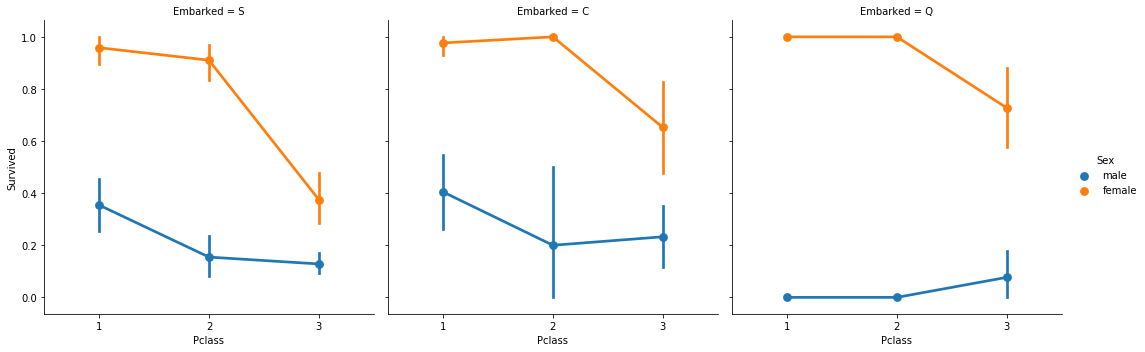

In [80]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train)

In [83]:
## as most of the people embarked form port S. We can fill two missing values as S.
train['Embarked'] = train['Embarked'].fillna('S')

In [84]:
train['Embarked'].isnull().any()

False

In [88]:
pd.crosstab(train.SibSp,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


Observations in a Nutshell for all features:

Sex: The chance of survival for women is high as compared to men.

Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. 
       The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is 
       almost 1 and is high too for those from Pclass2. Money Wins!!!.

Age: Children less than 5-10 years do have a high chance of survival. 
     Passengers between age group 15 to 35 died a lot.

Embarked: This is a very interesting feature. The chances of survival at C looks 
          to be better than even though the majority of Pclass1 passengers got up at S. 
          Passengers at Q were all from Pclass3.

Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a 
             greater chance of probablity rather than being alone or having a large family travelling with you.

## Part 2 : Feature engineering and cleaning and Day 4

In [89]:
train['Age_band'] = 0
train.loc[train['Age']<=16,'Age_band'] = 0 

In [90]:
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band'] = 1 

In [93]:
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band'] = 2 
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band'] = 3 
train.loc[(train['Age']>64),'Age_band'] = 4 

In [94]:
train['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


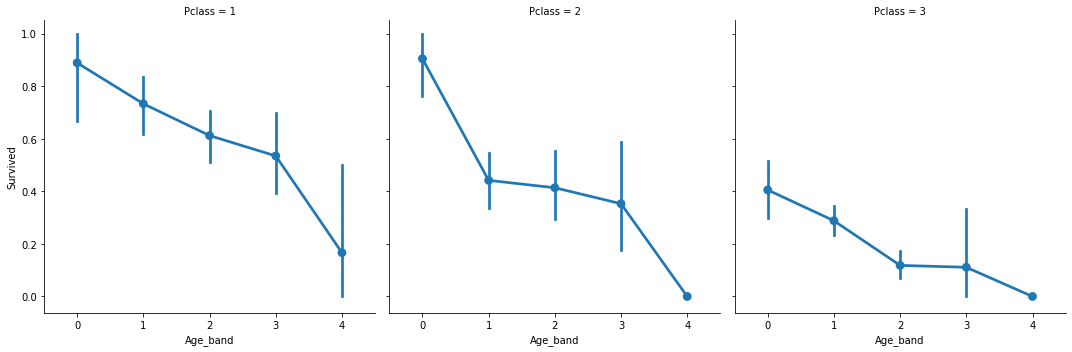

In [97]:
sns.factorplot('Age_band','Survived',data=train,col='Pclass')

In [100]:
train['Family_size'] = 0
train['Alone'] = 0
train['Family_size'] = train['Parch'] + train['SibSp']
train.loc[train['Family_size']==0,'Alone'] = 1 #meaning this person is alone

In [101]:
train.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jassification/anaconda3/lib/python3.7/site-packages/seab

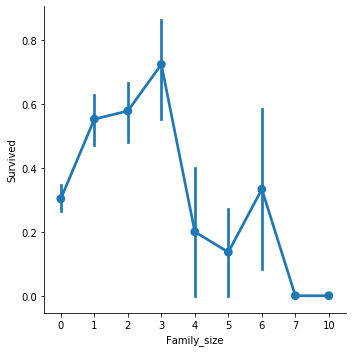

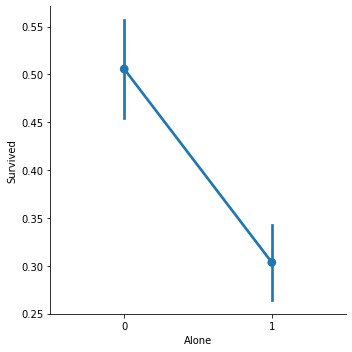

In [110]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_size','Survived',data=train,ax=ax[0])
ax[0].set_title('Family size vs Survived')

sns.factorplot('Alone','Survived',data=train,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(0)
plt.close(1)
plt.show()

In [111]:
## being alone is bad for survival, also having more than 4 is risky.

/Users/jassification/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


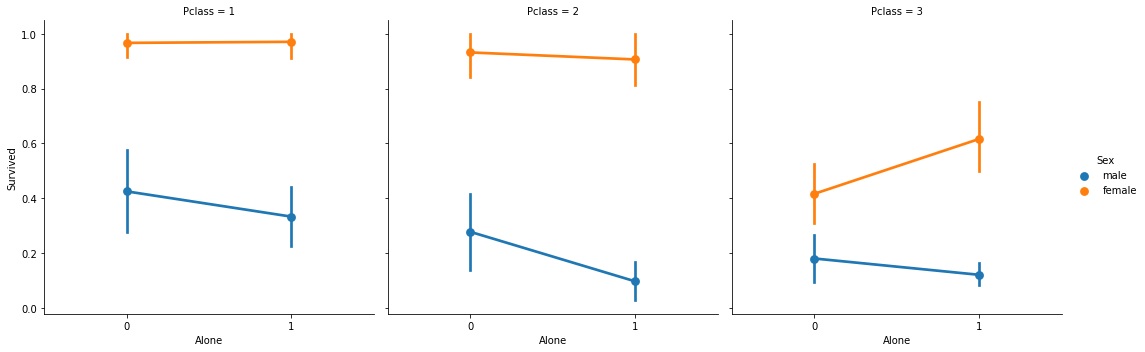

In [112]:
sns.factorplot('Alone','Survived',hue='Sex',col='Pclass',data=train)

In [113]:
## what you do above with age, could you not do the same with pandas qcut there?
## No you could not, it would only give you range for each group and not categories, so you can't use qcut as is.
## we did not use qcut in age cause we knew the range 16 by ourselved, it was easy
## doing it for fare range:
train['Fare_range'] = pd.qcut(train['Fare'],4)

In [116]:
train.groupby('Fare_range')['Survived'].mean()

Fare_range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [119]:
## as the fare range increases the chances of survival increases, fare range could be propotional to Pclass
train.groupby(['Pclass','Fare_range'])['Survived'].count()

Pclass  Fare_range     
1       (-0.001, 7.91]       6
        (7.91, 14.454]       0
        (14.454, 31.0]      51
        (31.0, 512.329]    159
2       (-0.001, 7.91]       6
        (7.91, 14.454]      86
        (14.454, 31.0]      70
        (31.0, 512.329]     22
3       (-0.001, 7.91]     211
        (7.91, 14.454]     138
        (14.454, 31.0]     101
        (31.0, 512.329]     41
Name: Survived, dtype: int64

In [120]:
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3

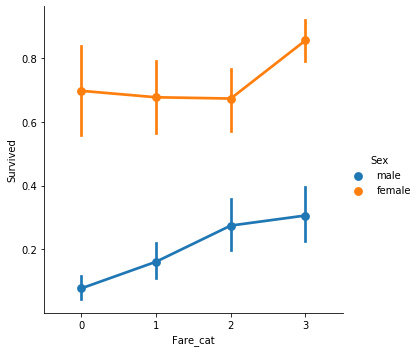

In [123]:
sns.factorplot('Fare_cat','Survived',hue='Sex',data=train)

In [126]:
# train['Sex'].replace(['male','female'],[0,1],inplace=True)
# train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [127]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [129]:
train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_range','PassengerId'],axis=1,inplace=True)

In [130]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,initial,Age_band,Family_size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


## Part 3: Predictive modelling

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [137]:
X = train.iloc[:,1:]
y = train['Survived']

In [138]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,initial,Age_band,Family_size,Alone,Fare_cat
0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,0,1,1,2,1,0,3
2,3,1,0,0,0,2,1,0,1,1
3,1,1,1,0,0,1,2,1,0,3
4,3,0,0,0,0,0,2,0,1,1


In [139]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [144]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction1 = model.predict(X_test)
print('The accuracy of radical SVM is ',metrics.accuracy_score(prediction1,y_test))

The accuracy of radical SVM is  0.832089552238806


In [147]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction2 = model.predict(X_test)
print('The accuracy of liner SVM is ',metrics.accuracy_score(prediction2,y_test))

The accuracy of liner SVM is  0.8246268656716418


In [148]:
## What is the difference between linear and radical SVM. Significance of C and gamma.

In [150]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction3 = model.predict(X_test)
print('The accuracy of Logistic regression is ',metrics.accuracy_score(prediction3,y_test))

The accuracy of Logistic regression is  0.8059701492537313


In [152]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction4 = model.predict(X_test)
print('The accuracy of Decision tree is ',metrics.accuracy_score(prediction4,y_test))

The accuracy of Decision tree is  0.7910447761194029


In [160]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction5 = model.predict(X_test)
print('The accuracy of KNN n=5(default) ',metrics.accuracy_score(prediction5,y_test))

The accuracy of KNN n=5(default)  0.7985074626865671


In [159]:
## for different N
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('The accuracy of KNN n=',i,' is ',metrics.accuracy_score(predictions,y_test))

The accuracy of KNN n= 1  is  0.7276119402985075
The accuracy of KNN n= 2  is  0.75
The accuracy of KNN n= 3  is  0.7910447761194029
The accuracy of KNN n= 4  is  0.7910447761194029
The accuracy of KNN n= 5  is  0.7985074626865671
The accuracy of KNN n= 6  is  0.8022388059701493
The accuracy of KNN n= 7  is  0.8022388059701493
The accuracy of KNN n= 8  is  0.8097014925373134
The accuracy of KNN n= 9  is  0.7910447761194029
The accuracy of KNN n= 10  is  0.8059701492537313


In [161]:
model = GaussianNB()
model.fit(X_train,y_train)
prediction6 = model.predict(X_test)
print('The accuracy of Gaussian model ',metrics.accuracy_score(prediction6,y_test))

The accuracy of Gaussian model  0.7947761194029851


In [162]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction7 = model.predict(X_test)
print('The accuracy of random forest classifier ',metrics.accuracy_score(prediction7,y_test))

The accuracy of random forest classifier  0.8134328358208955


In [166]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10,random_state=42)
mean = []
std = []
accuracy = []

models = [svm.SVC(kernel='rbf'),svm.SVC(kernel='linear'),LogisticRegression(),DecisionTreeClassifier(),GaussianNB()
         ,KNeighborsClassifier(n_neighbors=7),RandomForestClassifier(n_estimators=100)]

for i in models:
    cv_result = cross_val_score(i,X,y,cv=kfold,scoring='accuracy')
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
cross_val_models = pd.DataFrame({'Mean':mean,'Std':std},index=classifiers)
cross_val_models

,Mean,Std
Linear Svm,0.828290,0.034427
Radial Svm,0.793471,0.047797
Logistic Regression,0.805843,0.024061
KNN,0.806991,0.028067
Decision Tree,0.801386,0.028999
Naive Bayes,0.793583,0.033724
Random Forest,0.815968,0.029588


In [167]:
cv_result = cross_val_score(LogisticRegression(),X,y,cv=kfold,scoring='accuracy')
cv_result
## cross_val_score returns an array of accuracies for all fold combinations

array([0.8       , 0.82022472, 0.7752809 , 0.82022472, 0.78651685,
       0.78651685, 0.79775281, 0.79775281, 0.86516854, 0.80898876])

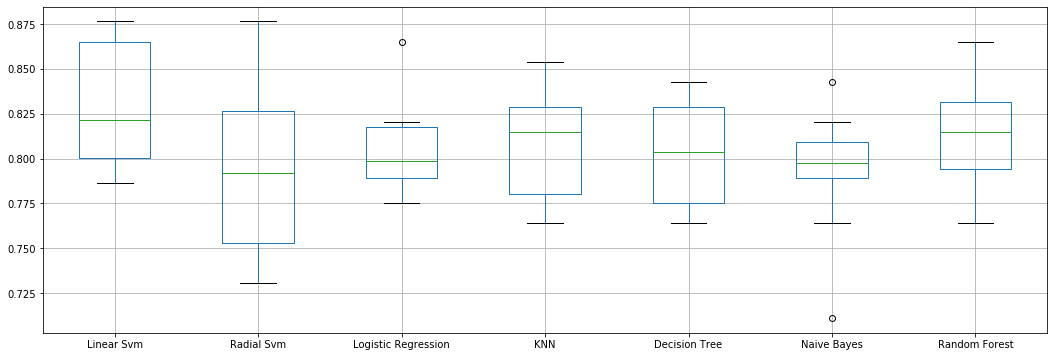

In [171]:
plt.subplots(figsize=(18,6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()

In [172]:
box

,0,1,2,3,4,5,6,7,8,9
Linear Svm,0.822222,0.876404,0.786517,0.876404,0.808989,0.820225,0.797753,0.786517,0.876404,0.831461
Radial Svm,0.811111,0.831461,0.752809,0.876404,0.775281,0.808989,0.741573,0.730337,0.853933,0.752809
Logistic Regression,0.800000,0.820225,0.775281,0.820225,0.786517,0.786517,0.797753,0.797753,0.865169,0.808989
KNN,0.777778,0.831461,0.786517,0.820225,0.808989,0.764045,0.820225,0.775281,0.853933,0.831461
Decision Tree,0.766667,0.764045,0.786517,0.831461,0.775281,0.831461,0.820225,0.775281,0.842697,0.820225
Naive Bayes,0.711111,0.820225,0.764045,0.808989,0.786517,0.797753,0.797753,0.808989,0.842697,0.797753
Random Forest,0.788889,0.853933,0.764045,0.808989,0.831461,0.820225,0.808989,0.786517,0.865169,0.831461


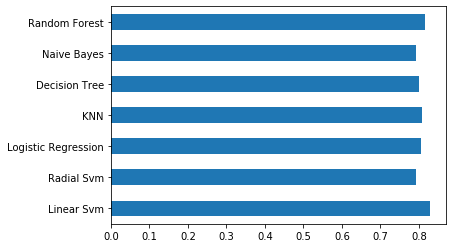

In [174]:
cross_val_models['Mean'].plot.barh()

### You can see that mean for Linear SVM is best from the given: 0.828290
### You can also try more things:
1. Hyper parameter Tuning
2. Ensembling:
    i) Voting classifier
    ii) Bagging
    iii) Boosting

### This concludes day 4.
For last 4 days went through pandas and Titanic competition.
Notebook used for reference: https://www.kaggle.com/ash316/eda-to-prediction-dietanic